Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
number plate: HR26 BP3543
Accuracy: 0.9
Precision: 1.0
Recall: 0.8333333333333334


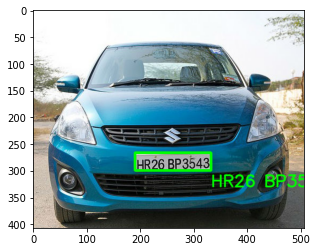

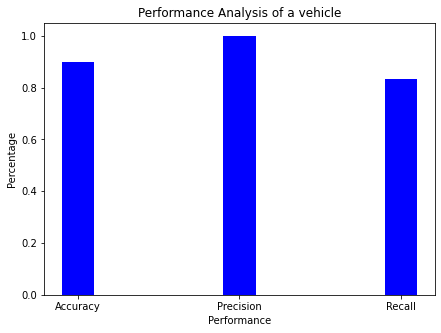

In [2]:
%pip install easyocr
%pip install imutils
%pip install opencv-python
get_ipython().run_line_magic('pip', 'install opencv-contrib-python')
import cv2
%pip install matplotlib
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
#Noise reduction
edged = cv2.Canny(bfilter, 30, 200) 
#Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)


%pip install sklearn
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

nb_samples = 100
x, y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
# fit the model with data
logreg.fit(xtrain,ytrain)

#
y_pred=logreg.predict(xtest)


plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
print("number plate:",text)
with open('output.txt','wt') as f:
    print(text,file=f)

import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Precision:",metrics.precision_score(ytest, y_pred))
print("Recall:",metrics.recall_score(ytest, y_pred))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Dataset generation
data_dict = {'Accuracy':metrics.accuracy_score(ytest, y_pred), 'Precision':metrics.precision_score(ytest, y_pred), 'Recall':metrics.recall_score(ytest, y_pred)}
keys = list(data_dict.keys())
values = list(data_dict.values())
# data = pd.read_csv('C:\\Users\\Vanshi\\Desktop\\data.csv')
  
# df = pd.DataFrame(data)
  
# X = list(df.iloc[:, 0])
# Y = list(df.iloc[:, 1])
fig = plt.figure(figsize = (7, 5))
#  Bar plot
plt.bar(keys, values, color ='blue',
 width = 0.2)
plt.xlabel("Performance")
plt.ylabel("Percentage")
plt.title("Performance Analysis of a vehicle")
plt.show()